In [39]:
# !kaggle datasets download rhonarosecortez/telco-customer-churn
# !unzip telco-customer-churn.zip

In [40]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# **Data Loading and Cleaning**

In [41]:
df = pd.read_csv('/content/TelcoCustomerChurn.csv')
df.head()

,CustomerID,Gender,Age,Under30,SeniorCitizen,Married,Dependents,NumberofDependents,Country,State,...,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,CustomerStatus,ChurnLabel,ChurnScore,CLTV,ChurnCategory,ChurnReason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [42]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Under30', 'SeniorCitizen', 'Married',
       'Dependents', 'NumberofDependents', 'Country', 'State', 'City',
       'ZipCode', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'ReferredaFriend', 'Number_of_Referrals', 'TenureinMonths', 'Offer',
       'PhoneService', 'AvgMonthlyLongDistanceCharges', 'MultipleLines',
       'InternetService', 'InternetType', 'AvgMonthlyGBDownload',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan',
       'PremiumTechSupport', 'StreamingTV', 'StreamingMovies',
       'StreamingMusic', 'UnlimitedData', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'SatisfactionScore', 'CustomerStatus', 'ChurnLabel', 'ChurnScore',
       'CLTV', 'ChurnCategory', 'ChurnReason'],
      dtype='object')

In [43]:
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')

CustomerID: 7043
Gender: 2
Age: 62
Under30: 2
SeniorCitizen: 2
Married: 2
Dependents: 2
NumberofDependents: 10
Country: 1
State: 1
City: 1106
ZipCode: 1626
Latitude: 1626
Longitude: 1625
Population: 1569
Quarter: 1
ReferredaFriend: 2
Number_of_Referrals: 12
TenureinMonths: 72
Offer: 5
PhoneService: 2
AvgMonthlyLongDistanceCharges: 3584
MultipleLines: 2
InternetService: 2
InternetType: 3
AvgMonthlyGBDownload: 50
OnlineSecurity: 2
OnlineBackup: 2
DeviceProtectionPlan: 2
PremiumTechSupport: 2
StreamingTV: 2
StreamingMovies: 2
StreamingMusic: 2
UnlimitedData: 2
Contract: 3
PaperlessBilling: 2
PaymentMethod: 3
MonthlyCharge: 1585
TotalCharges: 6540
TotalRefunds: 500
TotalExtraDataCharges: 16
TotalLongDistanceCharges: 6068
TotalRevenue: 6975
SatisfactionScore: 5
CustomerStatus: 3
ChurnLabel: 2
ChurnScore: 81
CLTV: 3438
ChurnCategory: 5
ChurnReason: 20


In [44]:
print(df.describe())
print('----------------------------------------------------')
print(df.info())
print('----------------------------------------------------')
print(df.isnull().sum())

               Age  NumberofDependents       ZipCode     Latitude  \
count  7043.000000         7043.000000   7043.000000  7043.000000   
mean     46.509726            0.468692  93486.070567    36.197455   
std      16.750352            0.962802   1856.767505     2.468929   
min      19.000000            0.000000  90001.000000    32.555828   
25%      32.000000            0.000000  92101.000000    33.990646   
50%      46.000000            0.000000  93518.000000    36.205465   
75%      60.000000            0.000000  95329.000000    38.161321   
max      80.000000            9.000000  96150.000000    41.962127   

         Longitude     Population  Number_of_Referrals  TenureinMonths  \
count  7043.000000    7043.000000          7043.000000     7043.000000   
mean   -119.756684   22139.603294             1.951867       32.386767   
std       2.154425   21152.392837             3.001199       24.542061   
min    -124.301372      11.000000             0.000000        1.000000   
25%    -

In [45]:
print(df['InternetService'].unique())
print(df['InternetType'].unique())
print(df['ChurnLabel'].unique())
print(df['ChurnCategory'].unique())
print(df['ChurnReason'].unique())

['Yes' 'No']
['DSL' 'Fiber Optic' 'Cable' nan]
['Yes' 'No']
['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' nan]
['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service provider' 'Poor expertise of phone support'
 'Deceased' nan 'Lack of self-service on Website']


In [46]:
col_w_null = ['Offer', 'InternetType','ChurnCategory','ChurnReason']

In [47]:
#Check if whether there is null values in Internet Type for 'Yes' value InternetService
print('null values for Yes value InternetService:', df[df['InternetService'] == 'Yes']['InternetType'].isnull().sum())
#Check if whether there is null values in ChurnCategory, ChurnReason for 'Yes' value ChurnLabel
print('null values for Yes value ChurnLabel:\n',df[df['ChurnLabel'] == 'Yes'][['ChurnCategory','ChurnReason']].isnull().sum())

null values for Yes value InternetService: 0
null values for Yes value ChurnLabel:
 ChurnCategory    0
ChurnReason      0
dtype: int64


In [48]:
df[['TenureinMonths','MonthlyCharge', 'TotalCharges', 'TotalRefunds','TotalExtraDataCharges', 'AvgMonthlyLongDistanceCharges','TotalLongDistanceCharges', 'TotalRevenue']]

,TenureinMonths,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,AvgMonthlyLongDistanceCharges,TotalLongDistanceCharges,TotalRevenue
0,1,39.65,39.65,0.00,20,0.00,0.00,59.65
1,8,80.65,633.30,0.00,0,48.85,390.80,1024.10
2,18,95.45,1752.55,45.61,0,11.33,203.94,1910.88
3,25,98.50,2514.50,13.43,0,19.76,494.00,2995.07
4,37,76.50,2868.15,0.00,0,6.33,234.21,3102.36
...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.40,19.31,0,22.77,1639.44,3039.53
7039,24,84.80,1990.50,48.23,0,36.05,865.20,2807.47
7040,72,103.20,7362.90,45.38,0,29.66,2135.52,9453.04
7041,11,29.60,346.45,27.24,0,0.00,0.00,319.21


We can see:
* Total Charges ~ Tenure * Monthly Charge
* Total Long Distance Charges = Tenure * AVG Long Distance Charge
* TotalRevenue = TotalCharges - TotalRefunds + TotalExtraDataCharges + TotalLongDistanceCharges

In [49]:
# Drop columns
# 'Age' --> drop 'Under30'
# 'NumberofDependents' --> drop 'Dependents'
# drop 'Country' and 'State' and 'Quarter' (as these columns have 1 unique value) and 'ZipCode'

In [50]:
df = df.drop(columns = ['Under30', 'Dependents','Country','State', 'Quarter', 'ZipCode'])
df.columns

Index(['CustomerID', 'Gender', 'Age', 'SeniorCitizen', 'Married',
       'NumberofDependents', 'City', 'Latitude', 'Longitude', 'Population',
       'ReferredaFriend', 'Number_of_Referrals', 'TenureinMonths', 'Offer',
       'PhoneService', 'AvgMonthlyLongDistanceCharges', 'MultipleLines',
       'InternetService', 'InternetType', 'AvgMonthlyGBDownload',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan',
       'PremiumTechSupport', 'StreamingTV', 'StreamingMovies',
       'StreamingMusic', 'UnlimitedData', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'SatisfactionScore', 'CustomerStatus', 'ChurnLabel', 'ChurnScore',
       'CLTV', 'ChurnCategory', 'ChurnReason'],
      dtype='object')

In [51]:
#Replace Null values
df.fillna('No', inplace = True)
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
SeniorCitizen,0
Married,0
NumberofDependents,0
City,0
Latitude,0
Longitude,0
Population,0


# **EDA**

In [52]:
# list out necessary numeric and object columns
num = []
ob = []
location = ['Latitude','Longitude']
for col in df.columns:
  if df[col].dtype == 'object':
    ob.append(col)
  elif col in location:
    continue
  else:
    num.append(col)
ob.remove('CustomerID')
print('numeric:', num)
print('object: ', ob)
print('location: ', location)

numeric: ['Age', 'NumberofDependents', 'Population', 'Number_of_Referrals', 'TenureinMonths', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue', 'SatisfactionScore', 'ChurnScore', 'CLTV']
object:  ['Gender', 'SeniorCitizen', 'Married', 'City', 'ReferredaFriend', 'Offer', 'PhoneService', 'MultipleLines', 'InternetService', 'InternetType', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan', 'PremiumTechSupport', 'StreamingTV', 'StreamingMovies', 'StreamingMusic', 'UnlimitedData', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'CustomerStatus', 'ChurnLabel', 'ChurnCategory', 'ChurnReason']
location:  ['Latitude', 'Longitude']


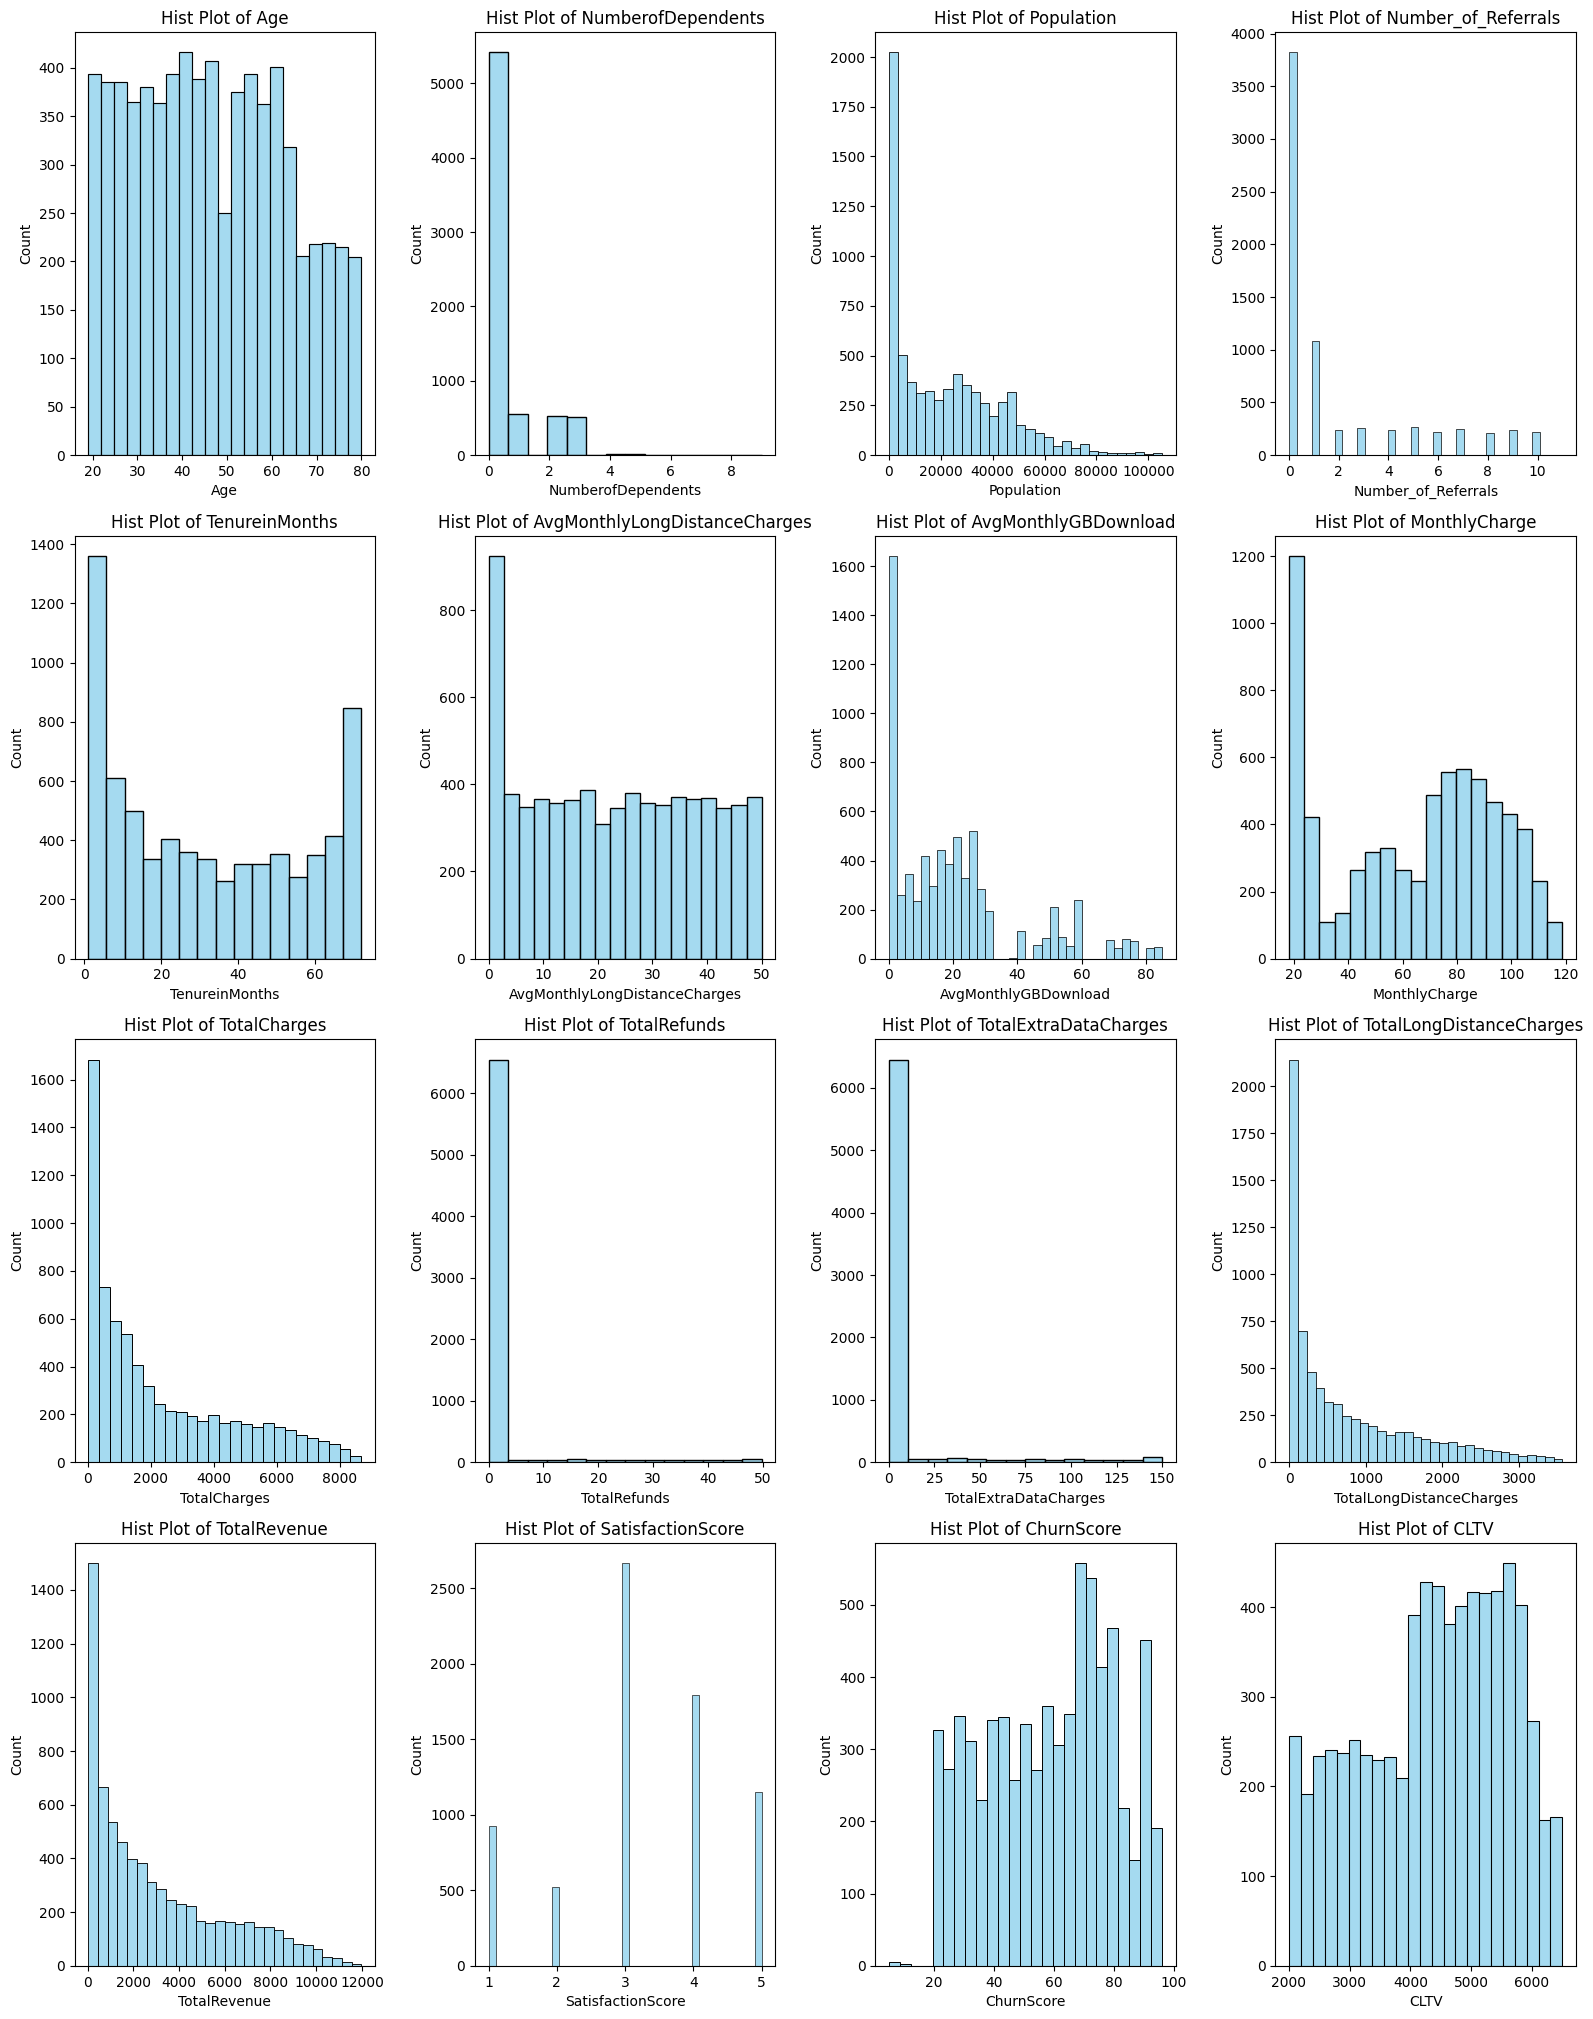

In [53]:
def plot_histplot(df, color = 'skyblue'):
  num_columns = len(df.columns)
  num_rows = (num_columns + 1) // 2

  fig, axes = plt.subplots(num_rows, 4, figsize = (16, 5 * num_rows))
  axes = axes.flatten()

  for i, column in enumerate(df.columns):
    sns.histplot(data = df, x = column, ax = axes[i], color = color)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Hist Plot of {column}')

  for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
plot_histplot(df[num])

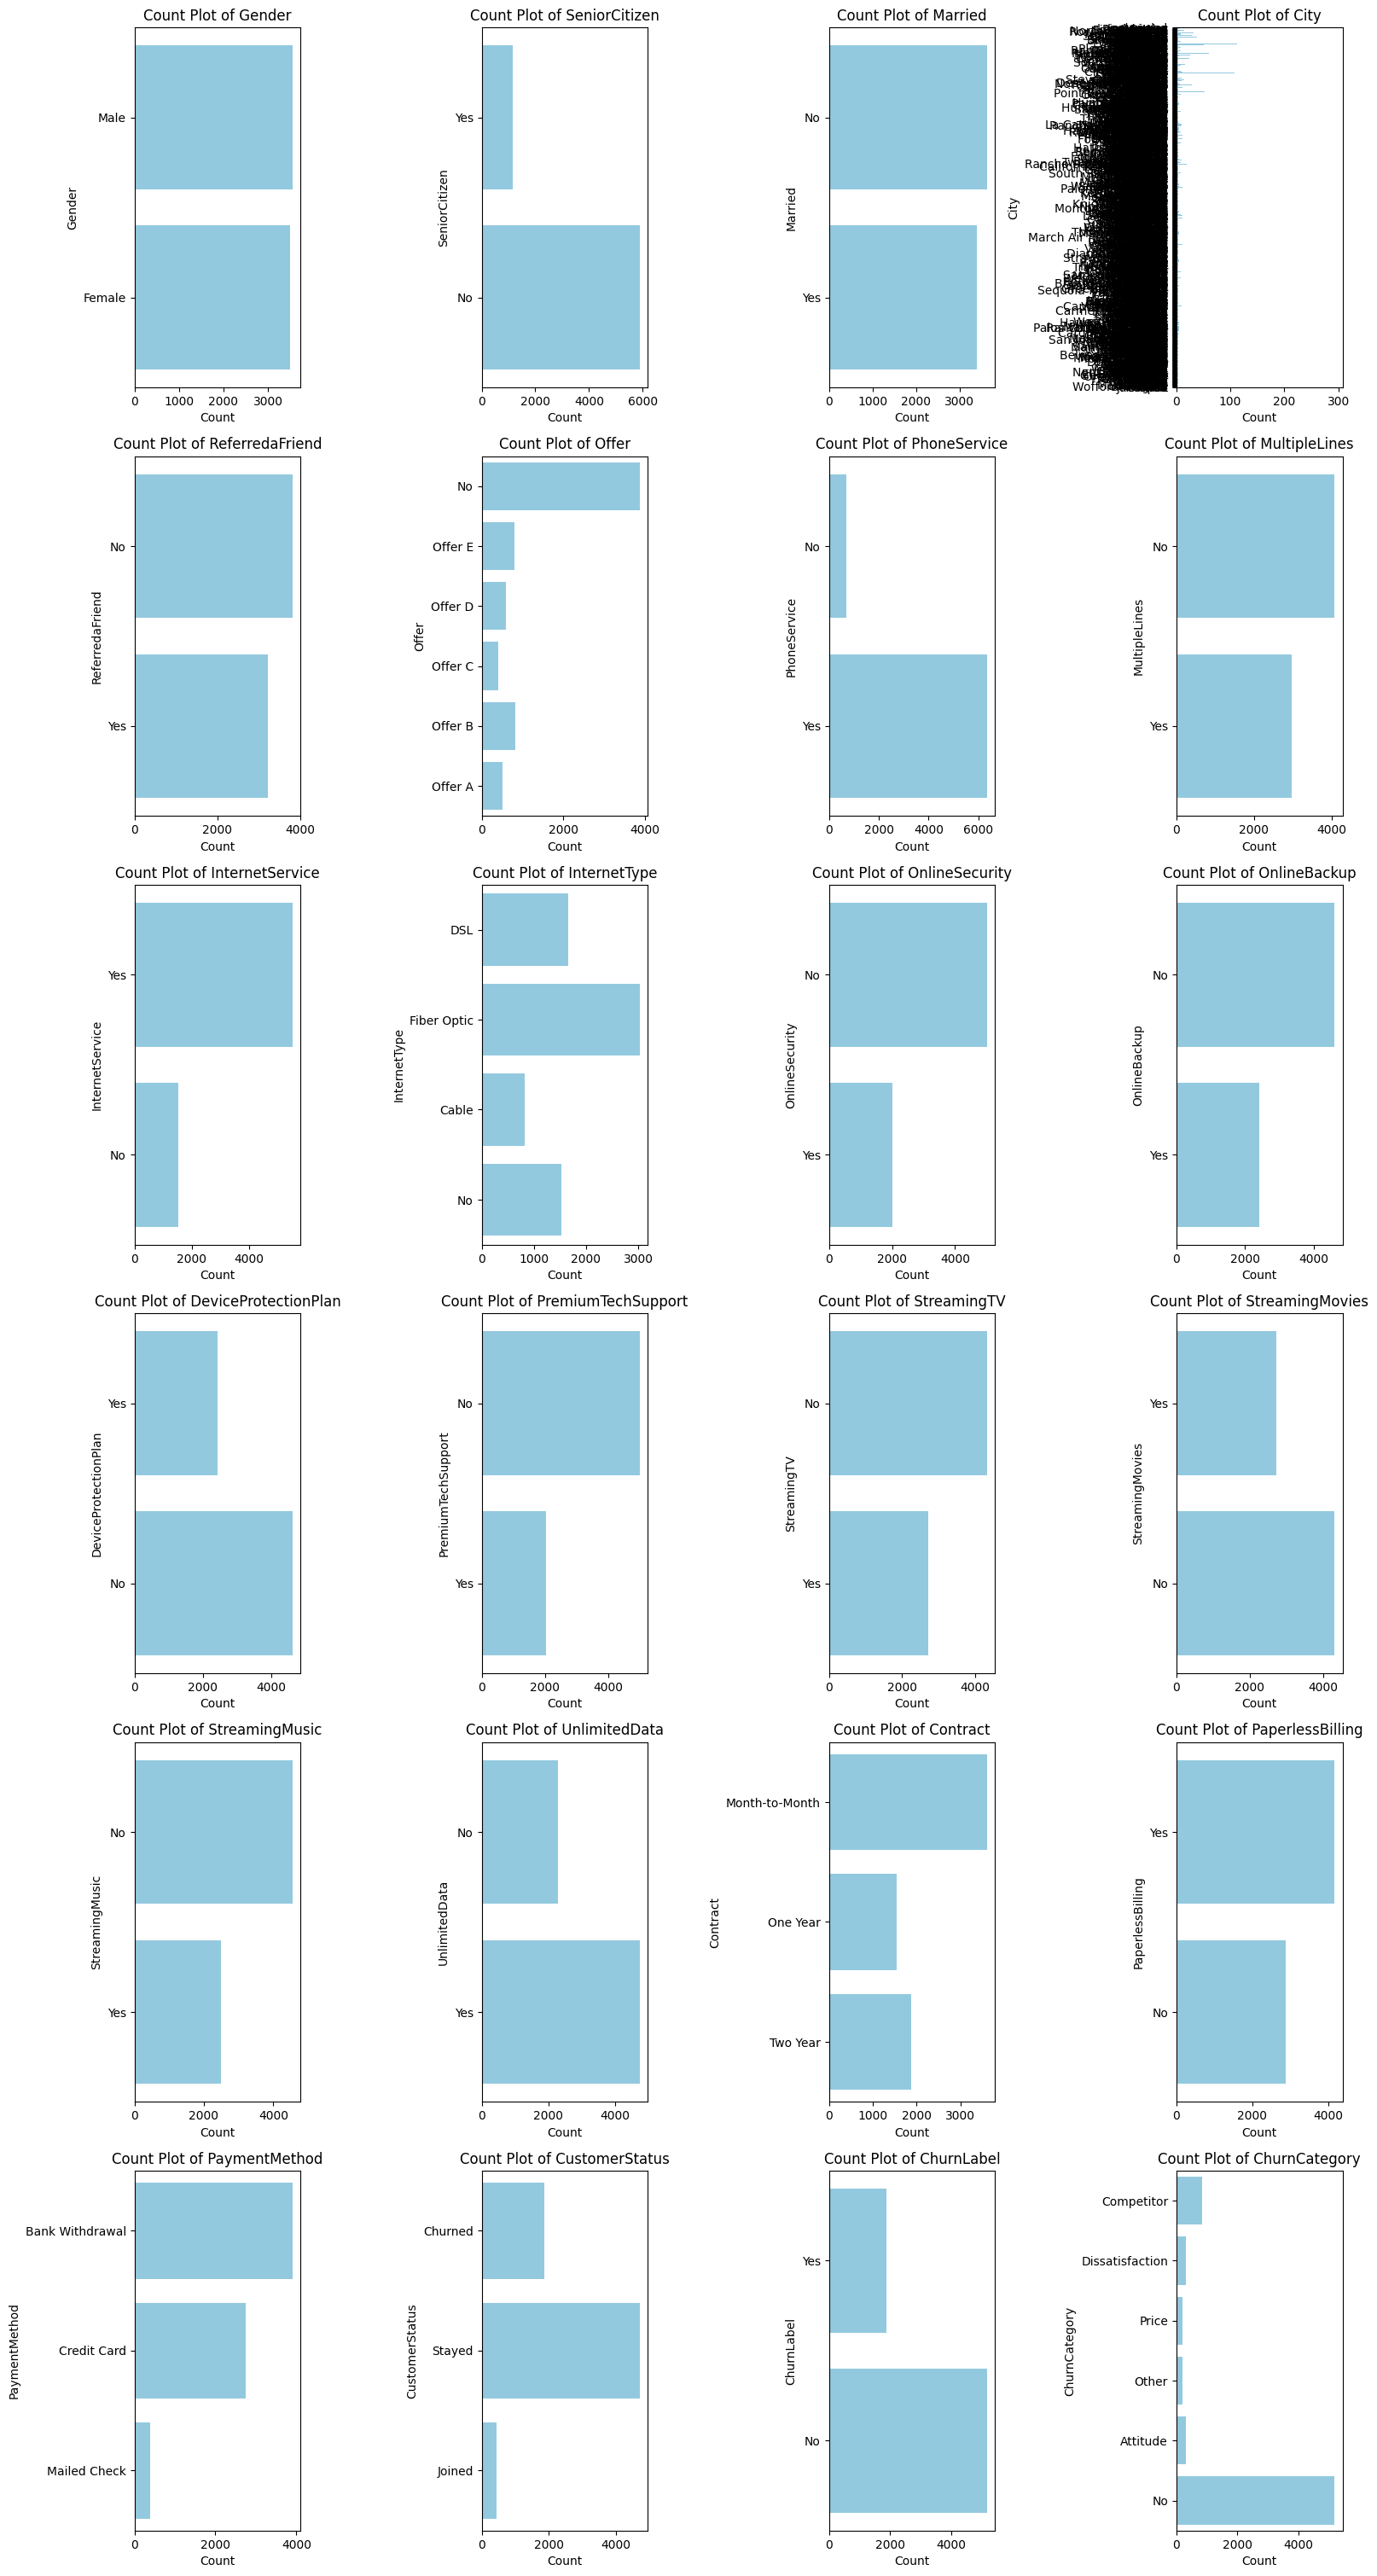

In [54]:
def plot_countplot(df, color = 'skyblue'):
  num_columns = len(df.columns)
  num_rows = (num_columns + 1) // 2

  fig, axes = plt.subplots(num_rows, 4 , figsize = (16, 5 * num_rows))
  axes = axes.flatten()

  for i, column in enumerate(df.columns):
    sns.countplot(data = df, y = column, ax = axes[i], color = color)
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Count')
    axes[i].set_title(f'Count Plot of {column}')

  for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
plot_countplot(df[ob].drop(columns = ['ChurnReason']))

Text(0.5, 1.0, 'Count Plot of Churn Reason')

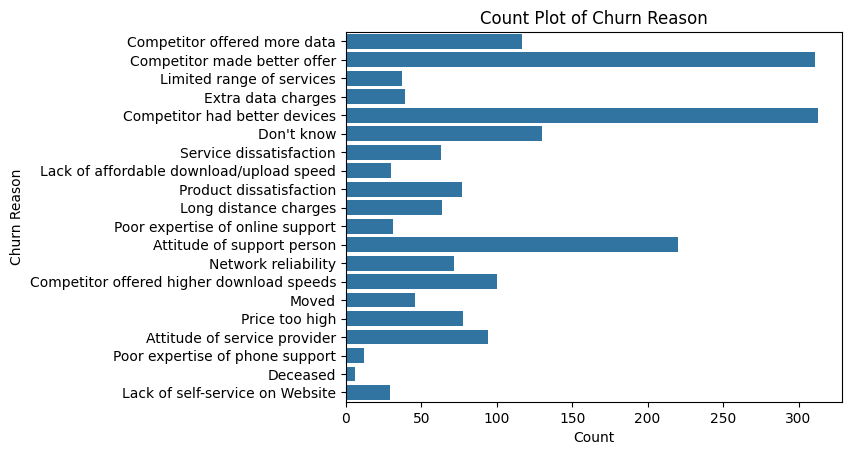

In [55]:
sns.countplot(data = df[df['ChurnReason'] != 'No'], y = 'ChurnReason')
plt.ylabel('Churn Reason')
plt.xlabel('Count')
plt.title('Count Plot of Churn Reason')

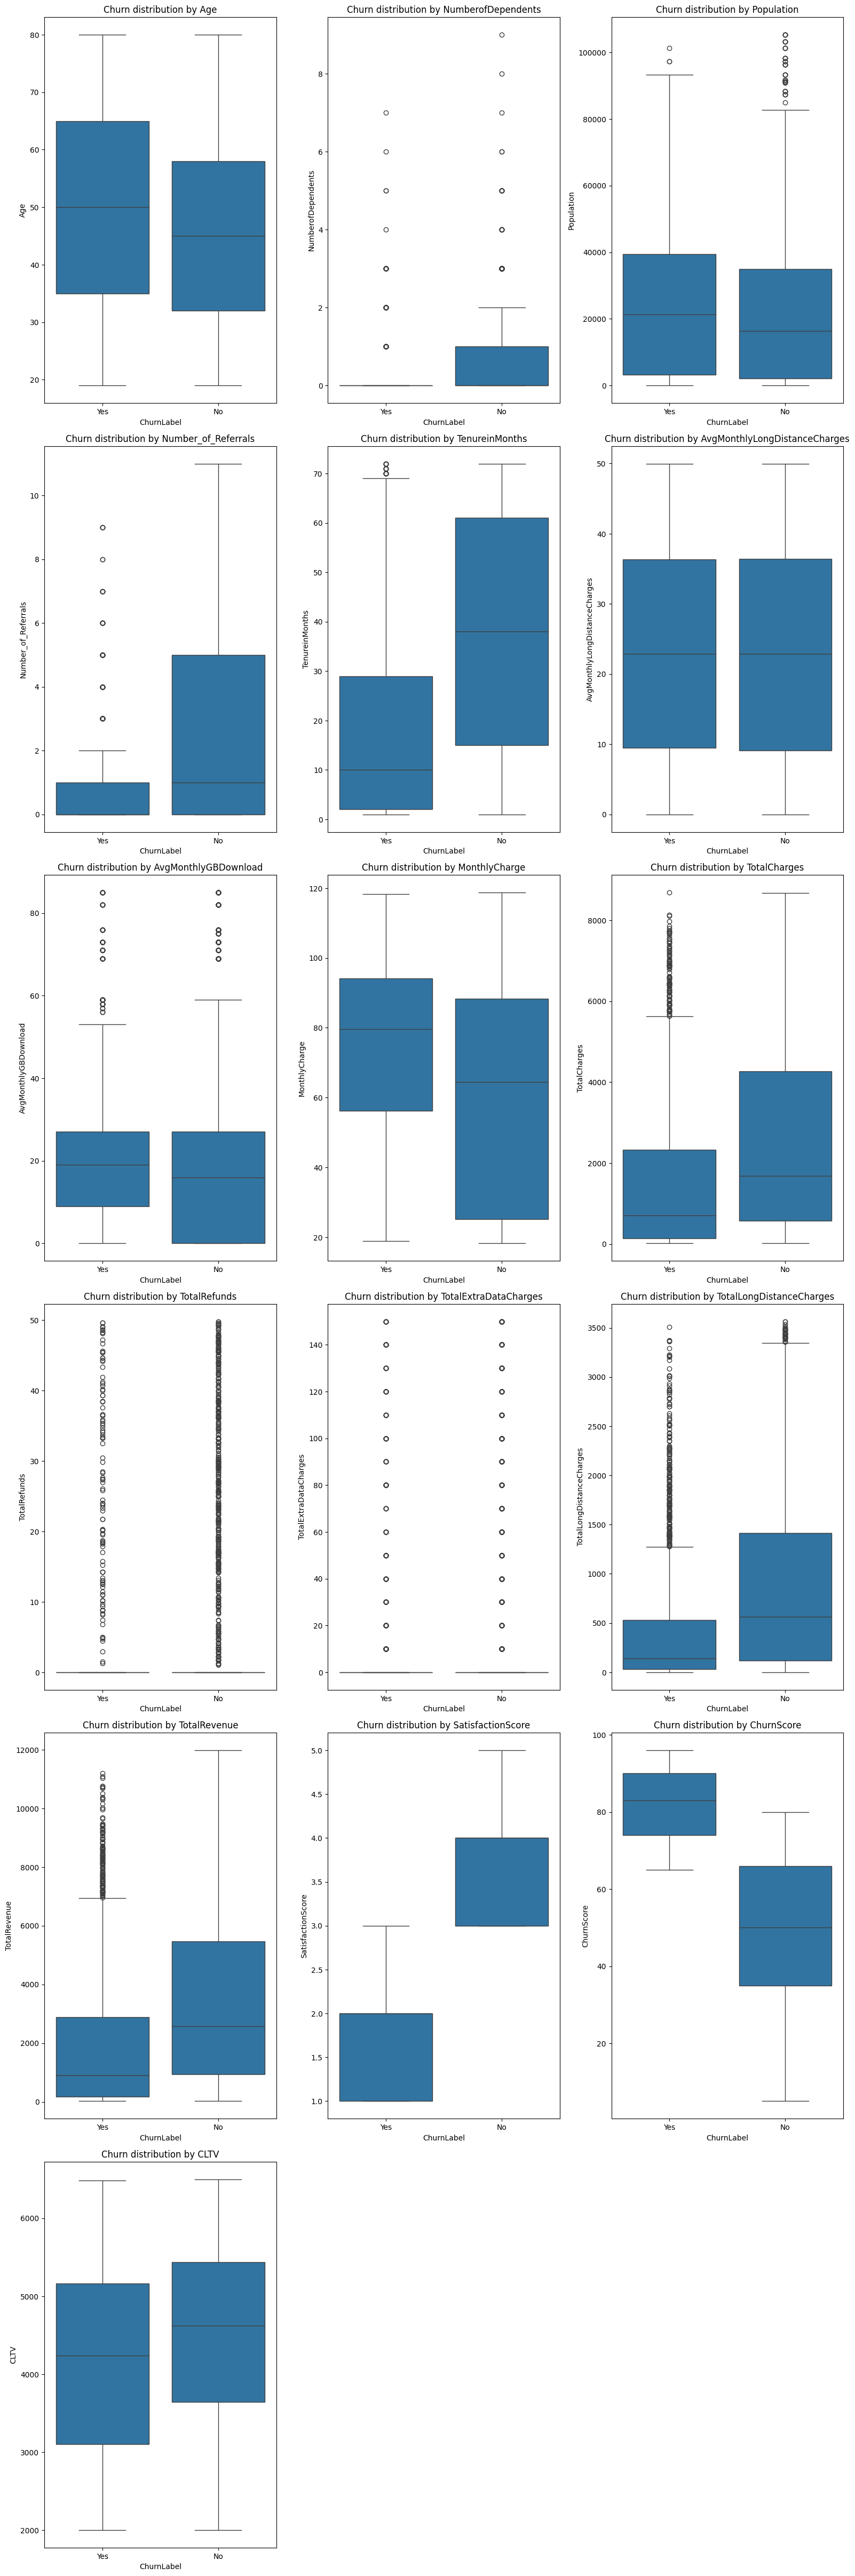

In [56]:
def plot_boxplot(df, x):
  num_columns = len(df.drop(columns = x).columns)
  num_rows = (num_columns + 1) // 2

  fig, axes = plt.subplots(num_rows, 3, figsize = (16, 8 * num_rows))
  axes = axes.flatten()
  for i, column in enumerate(df.drop(columns = x).columns):
    sns.boxplot(data = df, x = x, y = column, ax = axes[i])
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Churn distribution by {column}')

  for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
plot_boxplot(df[['ChurnLabel'] + num], x = 'ChurnLabel')

In [57]:
df['City_count'] = df.groupby('City')['City'].transform('count')
df[['City','City_count']]

,City,City_count
0,Los Angeles,293
1,Los Angeles,293
2,Los Angeles,293
3,Inglewood,25
4,Whittier,30
...,...,...
7038,Landers,4
7039,Adelanto,5
7040,Amboy,5
7041,Angelus Oaks,4


In [21]:
plt.figure(figsize = (20,10))
fig = go.Figure(data = go.Scattergeo(
    lon = df['Longitude'],
    lat = df['Latitude'],
    text = df['City'],
    mode = 'markers',
    marker = dict(
        size = 3,
        opacity = 0.5,
        reversescale = False,
        autocolorscale = False,
        symbol = 'circle',
        line = dict(
            width = 0.3,
            color = 'rgba(102, 102, 102)'
        ),
        colorscale = 'Blues',
        cmin = 0,
        color = df['City_count'],
        cmax = df['City_count'].max(),
        colorbar_title = 'City Count'
    )
))
fig.update_layout(
    title = 'Customer Location',
    geo_scope = 'usa',
)

fig.show()

<Figure size 2000x1000 with 0 Axes>

# **Feature Engineering**

**Correlation Matrix**

<Axes: >

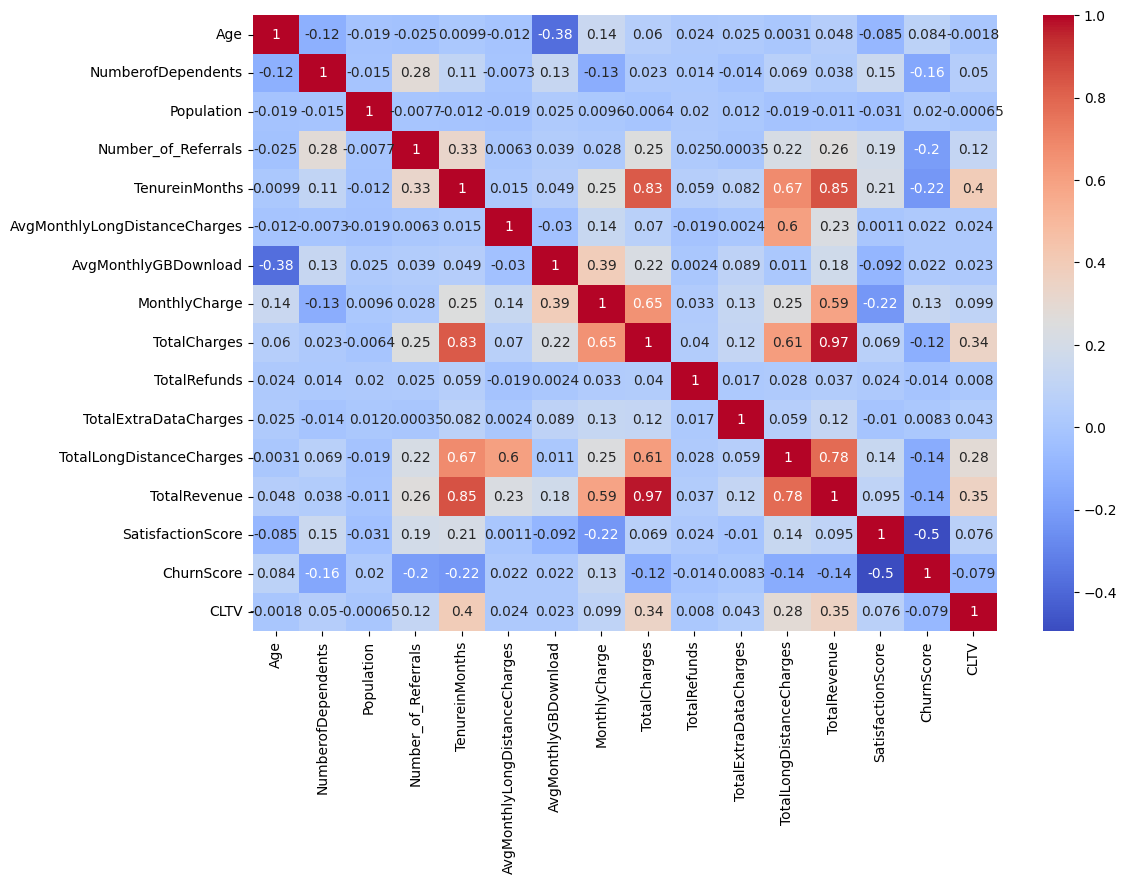

In [22]:
correlation = df[num].corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

1. TenureinMonths are highly positively correlated with TotalCharges, TotalLongDistanceCharges, TotalRevenue.
2. AVGMonthlyGBDownload is positive correlated with TotalLongDistanceCharges.
3. MonthlyCharge is positive correlated with TotalRevenue
4. TotalCharges is positively correlated with TotalLongDistanceCharges.
5. TotalCharges is excessively correlated with Total Revenue.
6. TotalLongDistanceCharges is positively correlated with TotalRevenue
7. SatisfactionScire is negatively correlated with ChurnScore
--> There are some features need to be removed before building a machine learning model to avoid colinearity.
These considered features are TotalCharges, TotalLongDistanceCharges, TotalRevenue

**Applying onehotencoding to categorical data and create a new dataframe**

In [23]:
for col in ob:
  print(f'{col}: {df[col].unique()}')

Gender: ['Male' 'Female']
SeniorCitizen: ['Yes' 'No']
Married: ['No' 'Yes']
City: ['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']
ReferredaFriend: ['No' 'Yes']
Offer: ['No' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['Yes' 'No']
InternetType: ['DSL' 'Fiber Optic' 'Cable' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['No' 'Yes']
DeviceProtectionPlan: ['Yes' 'No']
PremiumTechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['Yes' 'No']
StreamingMusic: ['No' 'Yes']
UnlimitedData: ['No' 'Yes']
Contract: ['Month-to-Month' 'One Year' 'Two Year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Bank Withdrawal' 'Credit Card' 'Mailed Check']
CustomerStatus: ['Churned' 'Stayed' 'Joined']
ChurnLabel: ['Yes' 'No']
ChurnCategory: ['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' 'No']
ChurnReason: ['Competitor offered more data' 'Competitor made better offer'
 'Limit

In [24]:
# Columns with 2 values --> get_dummies
# Columns with more than 2 values --> OneHotEncoder
# Remove City as the data is not necessary
# Remove ChurnReason as the data is categorized in ChurnLabel
ob.remove('City')
ob.remove('ChurnReason')
ob_dummies = []
ob_ohe = []
for col in ob:
  if df[col].nunique() == 2:
    ob_dummies.append(col)
  else:
    ob_ohe.append(col)
print(ob_dummies)
print(ob_ohe)

['Gender', 'SeniorCitizen', 'Married', 'ReferredaFriend', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan', 'PremiumTechSupport', 'StreamingTV', 'StreamingMovies', 'StreamingMusic', 'UnlimitedData', 'PaperlessBilling', 'ChurnLabel']
['Offer', 'InternetType', 'Contract', 'PaymentMethod', 'CustomerStatus', 'ChurnCategory']


In [25]:
#get dummies
dummies = pd.get_dummies(df[ob_dummies],drop_first = True).astype(int)
for col in dummies.columns:
  if col == 'Gender_Male':
    dummies.rename(columns = {'Gender_Male' : 'Gender'}, inplace = True)
  else:
    dummies.rename(columns = {col : col[:-4]}, inplace = True)
dummies.head()

,Gender,SeniorCitizen,Married,ReferredaFriend,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,PaperlessBilling,ChurnLabel
0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1
1,0,1,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1
2,1,1,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1
3,0,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,1
4,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1


In [26]:
dummies.describe()

,Gender,SeniorCitizen,Married,ReferredaFriend,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,PaperlessBilling,ChurnLabel
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.457476,0.903166,0.421837,0.783331,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.353259,0.673719,0.592219,0.265370
std,0.500013,0.368612,0.499748,0.498224,0.295752,0.493888,0.412004,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.478016,0.468885,0.491457,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Apply onehotencoder
ohe = OneHotEncoder(sparse_output=False)
encoded_cols = ohe.fit_transform(df[ob_ohe])
encoded_cols_df = pd.DataFrame(encoded_cols, columns = ohe.get_feature_names_out(ob_ohe))
new_df = pd.concat([df[num], dummies, encoded_cols_df], axis = 1)

In [28]:
new_df

,Age,NumberofDependents,Population,Number_of_Referrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,MonthlyCharge,TotalCharges,TotalRefunds,...,PaymentMethod_Mailed Check,CustomerStatus_Churned,CustomerStatus_Joined,CustomerStatus_Stayed,ChurnCategory_Attitude,ChurnCategory_Competitor,ChurnCategory_Dissatisfaction,ChurnCategory_No,ChurnCategory_Other,ChurnCategory_Price
0,78,0,68701,0,1,0.00,8,39.65,39.65,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,74,1,55668,1,8,48.85,17,80.65,633.30,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,71,3,47534,0,18,11.33,52,95.45,1752.55,45.61,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,78,1,27778,1,25,19.76,12,98.50,2514.50,13.43,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,80,1,26265,1,37,6.33,14,76.50,2868.15,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,30,0,2182,0,72,22.77,0,21.15,1419.40,19.31,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7039,38,2,18980,1,24,36.05,24,84.80,1990.50,48.23,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7040,30,2,42,4,72,29.66,59,103.20,7362.90,45.38,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7041,32,2,301,1,11,0.00,17,29.60,346.45,27.24,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
#Removing colinear features
new_df.drop(columns = ['TotalCharges', 'TotalLongDistanceCharges', 'TotalRevenue'], inplace = True)

In [30]:
new_df.head()

,Age,NumberofDependents,Population,Number_of_Referrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,MonthlyCharge,TotalRefunds,TotalExtraDataCharges,...,PaymentMethod_Mailed Check,CustomerStatus_Churned,CustomerStatus_Joined,CustomerStatus_Stayed,ChurnCategory_Attitude,ChurnCategory_Competitor,ChurnCategory_Dissatisfaction,ChurnCategory_No,ChurnCategory_Other,ChurnCategory_Price
0,78,0,68701,0,1,0.00,8,39.65,0.00,20,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,74,1,55668,1,8,48.85,17,80.65,0.00,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,71,3,47534,0,18,11.33,52,95.45,45.61,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,78,1,27778,1,25,19.76,12,98.50,13.43,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,80,1,26265,1,37,6.33,14,76.50,0.00,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **In this case we use churn label as the y**


In [31]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

<Axes: xlabel='ChurnLabel', ylabel='count'>

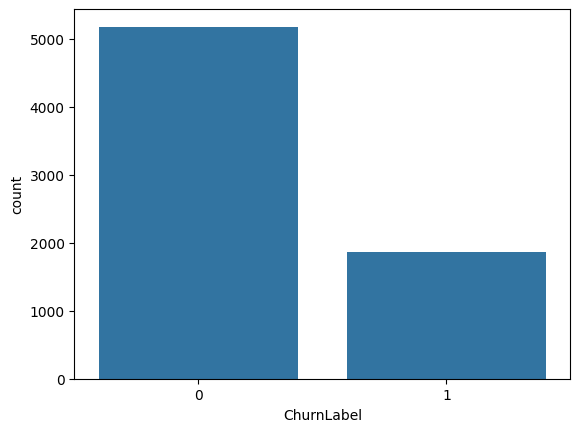

In [32]:
sns.countplot(data = new_df, x = 'ChurnLabel')

**Balancing the Dataset**


In [33]:
x = new_df.drop(columns = ['ChurnLabel'])
y = new_df['ChurnLabel']

In [34]:
#Spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 54)
(1409, 54)
(5634,)
(1409,)


<Axes: xlabel='ChurnLabel', ylabel='count'>

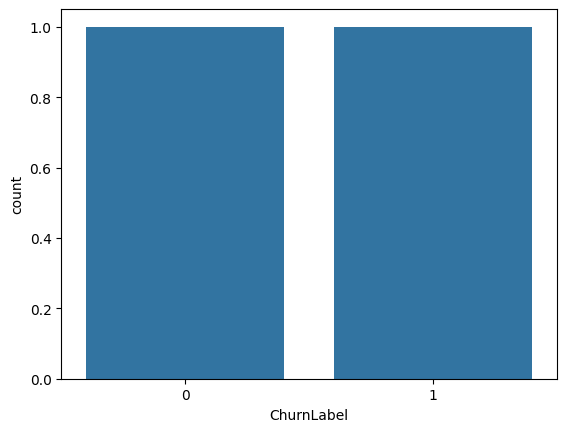

In [36]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
counter_before = Counter(y)
counter_after = Counter(y_train_resampled)
df_after = pd.DataFrame(list(counter_after.items()), columns = ['ChurnLabel', 'Count'])
sns.countplot(data = df_after, x = 'ChurnLabel')

Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



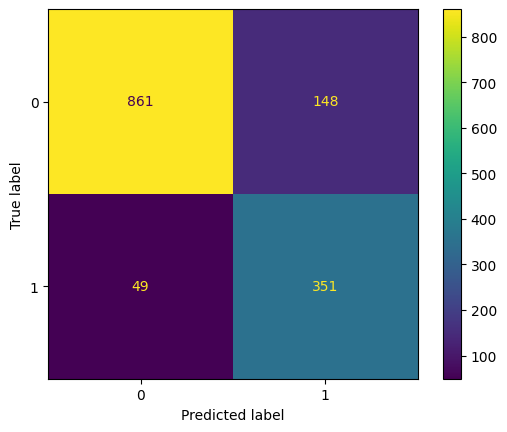

[[861 148]
 [ 49 351]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1009
           1       0.70      0.88      0.78       400

    accuracy                           0.86      1409
   macro avg       0.82      0.87      0.84      1409
weighted avg       0.88      0.86      0.86      1409

Accuracy score: 86.01845280340667


In [37]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
lr_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, lr_pred)
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.show()
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print('Accuracy score:',accuracy_score(y_test, lr_pred)*100)